[View in Colaboratory](https://colab.research.google.com/github/karangautam/machine_learning_examples/blob/master/Fashion_MNIST.ipynb)

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karangautam","key":"7886fb75a6cbe6a3bf59d84dcbab4904"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  2 20:59 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 /content/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                             title                                     size  lastUpdated          downloadCount  
--------------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  
stackoverflow/stack-overflow-2018-developer-survey              Stack Overflow 2018 Developer Survey      20MB  2018-05-15 16:59:54            469  
jameslko/gun-violence-data                                      Gun Violence Data                         34MB  2018-04-15 06:18:09           5586  
donorschoose/io                                                 Data Science For Good: DonorsChoose.org    1GB  2018-05-14 19:26:30           3887  
jessicali9530/honey-production                                  Honey Production In The USA (1998-2012)   80KB  2018-04-09 23:31:19           2441  
ruslankl/mice-protein-expression                                Mice Protein Expression                  9

In [7]:
!kaggle datasets list -s fashion

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
zalando-research/fashionmnist                                  Fashion MNIST                                      69MB  2017-12-07 00:54:20           9766  
pytorch/densenet121                                            DenseNet-121                                       29MB  2017-12-12 21:07:40             26  
PromptCloudHQ/innerwear-data-from-victorias-secret-and-others  Innerwear Data from Victoria's Secret and Others  506MB  2017-08-09 08:21:20           1034  
nicw102168/snake-eyes                                          Snake Eyes                                        126MB  2017-11-25 19:04:48            397  
pytorch/densenet201                                       

In [9]:
!kaggle datasets download -d zalando-research/fashionmnist 

fashionmnist.zip: Downloaded 69MB of 69MB to /content/.kaggle/datasets/zalando-research/fashionmnist


In [10]:
!dir

datalab  kaggle.json


In [0]:
! dir datalab

In [12]:
!dir

datalab  kaggle.json


In [0]:
!cd datalab

In [14]:
!dir

datalab  kaggle.json


In [0]:
import pandas as pd
import numpy as np

In [0]:
data_train = pd.read_csv('/content/.kaggle/datasets/zalando-research/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('/content/.kaggle/datasets/zalando-research/fashionmnist/fashion-mnist_test.csv')

In [0]:
import keras
from keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.models import Sequential
from keras.optimizers import adam

In [39]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:

Y=data_train['label'].values
X = data_train.iloc[:,data_train.columns != 'label'].values

In [0]:
X= X.reshape(-1,28,28,1)/255.0

In [0]:
Y= keras.utils.to_categorical(Y,10)

In [46]:
print(X.shape)
print(Y.shape)

(60000, 28, 28, 1)
(60000, 10)


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])



In [57]:
history = model.fit(X,Y,epochs=12,validation_split=0.33,batch_size=128)

Train on 40199 samples, validate on 19801 samples
Epoch 1/12
40199/40199 [==============================] - 10s 249us/step - loss: 0.1507 - acc: 0.9440 - val_loss: 0.3597 - val_acc: 0.8919
Epoch 2/12
40199/40199 [==============================] - 10s 248us/step - loss: 0.1418 - acc: 0.9480 - val_loss: 0.3750 - val_acc: 0.8966
Epoch 3/12
20864/40199 [==============>...............] - ETA: 4s - loss: 0.1368 - acc: 0.9491

40199/40199 [==============================] - 10s 242us/step - loss: 0.1385 - acc: 0.9483 - val_loss: 0.4060 - val_acc: 0.8843
Epoch 4/12
40199/40199 [==============================] - 10s 236us/step - loss: 0.1277 - acc: 0.9522 - val_loss: 0.3712 - val_acc: 0.8961
Epoch 5/12
40199/40199 [==============================] - 9s 233us/step - loss: 0.1138 - acc: 0.9575 - val_loss: 0.4572 - val_acc: 0.8822
Epoch 6/12
 4608/40199 [==>...........................] - ETA: 7s - loss: 0.1329 - acc: 0.9477

40199/40199 [==============================] - 9s 235us/step - loss: 0.1186 - acc: 0.9560 - val_loss: 0.5208 - val_acc: 0.8560
Epoch 7/12
40199/40199 [==============================] - 10s 243us/step - loss: 0.1072 - acc: 0.9598 - val_loss: 0.4779 - val_acc: 0.8758
Epoch 8/12
40064/40199 [============================>.] - ETA: 0s - loss: 0.1223 - acc: 0.9544

40199/40199 [==============================] - 10s 244us/step - loss: 0.1224 - acc: 0.9544 - val_loss: 0.3997 - val_acc: 0.8924
Epoch 9/12
40199/40199 [==============================] - 10s 241us/step - loss: 0.0934 - acc: 0.9648 - val_loss: 0.4116 - val_acc: 0.8965
Epoch 10/12
40199/40199 [==============================] - 10s 241us/step - loss: 0.0907 - acc: 0.9658 - val_loss: 0.4359 - val_acc: 0.8903
Epoch 11/12
 5760/40199 [===>..........................] - ETA: 6s - loss: 0.0793 - acc: 0.9693

40199/40199 [==============================] - 10s 242us/step - loss: 0.0879 - acc: 0.9668 - val_loss: 0.4405 - val_acc: 0.8875
Epoch 12/12
40199/40199 [==============================] - 10s 251us/step - loss: 0.0932 - acc: 0.9649 - val_loss: 0.4353 - val_acc: 0.8969


In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [52]:
print(history)

In [53]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


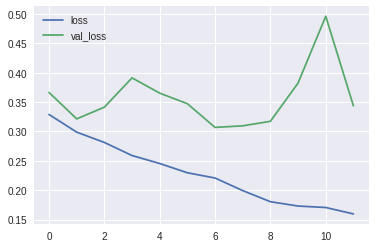

In [54]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

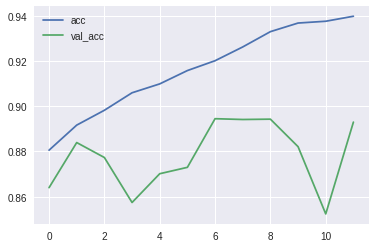

In [56]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()
plt.show()